# Sentence BERT clustering demo

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer

In [15]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

In [28]:
print("Train data size: ", len(newsgroups_train.data))

print("Average train data length: ", np.mean([len(x.split()) for x in newsgroups_train.data]))

print("Train data labels: ", newsgroups_train.target_names)
print("Number of train data labels: ", len(newsgroups_train.target_names))

print(f"Example: ({newsgroups_train.target_names[newsgroups_train.target[0]]}): ", newsgroups_train.data[0])

Train data size:  11314
Test data size:  7532
Average train data length:  185.82738200459607
Train data labels:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Number of train data labels:  20
Example: (rec.autos):  I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on 

In [27]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

train_embeddings = model.encode(newsgroups_train.data, show_progress_bar=True)

Batches: 100%|██████████| 354/354 [00:21<00:00, 16.14it/s]


In [31]:
from sklearn.cluster import KMeans
num_clusters = 20 # Could be optimized later using validation indices
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(train_embeddings)

/home/merlo/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering accuracy:  0.3730289258978143
Silhouette score:  0.057368387


In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=5000, n_iter_without_progress=200, perplexity=35)
tsne_embeddings = tsne.fit_transform(train_embeddings)

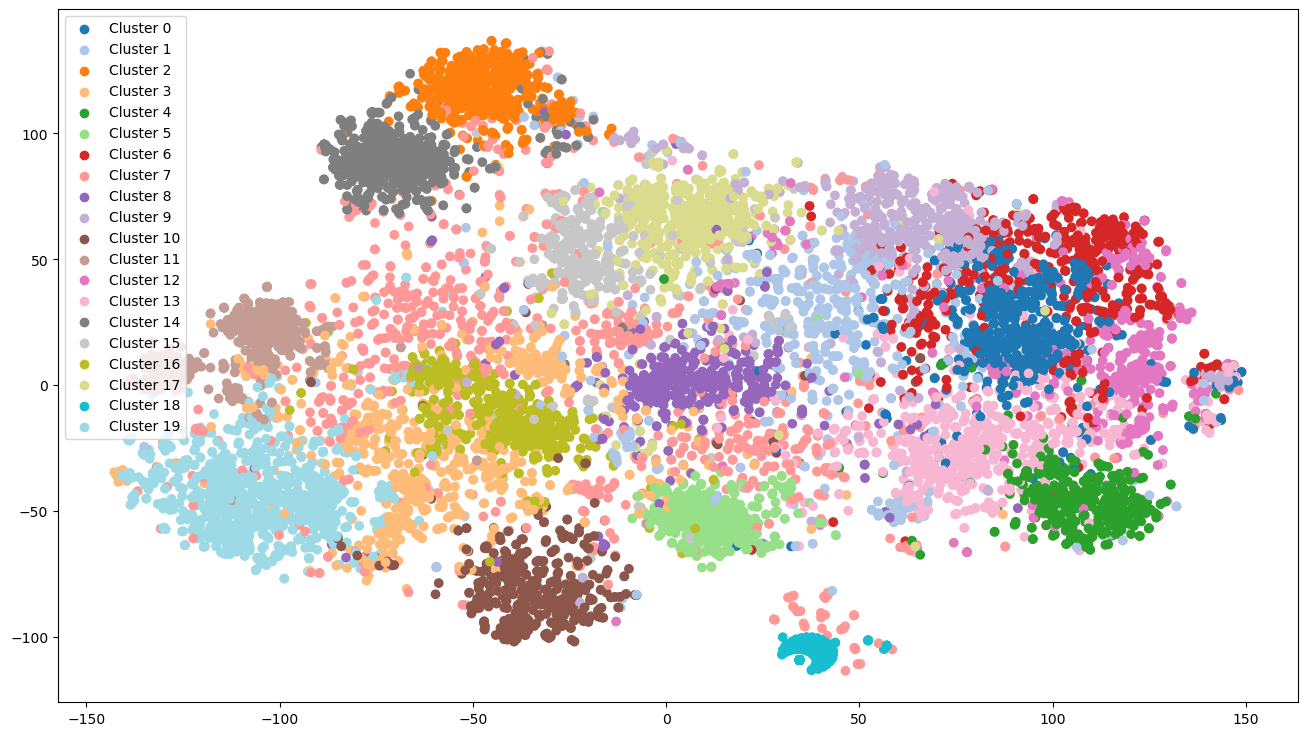

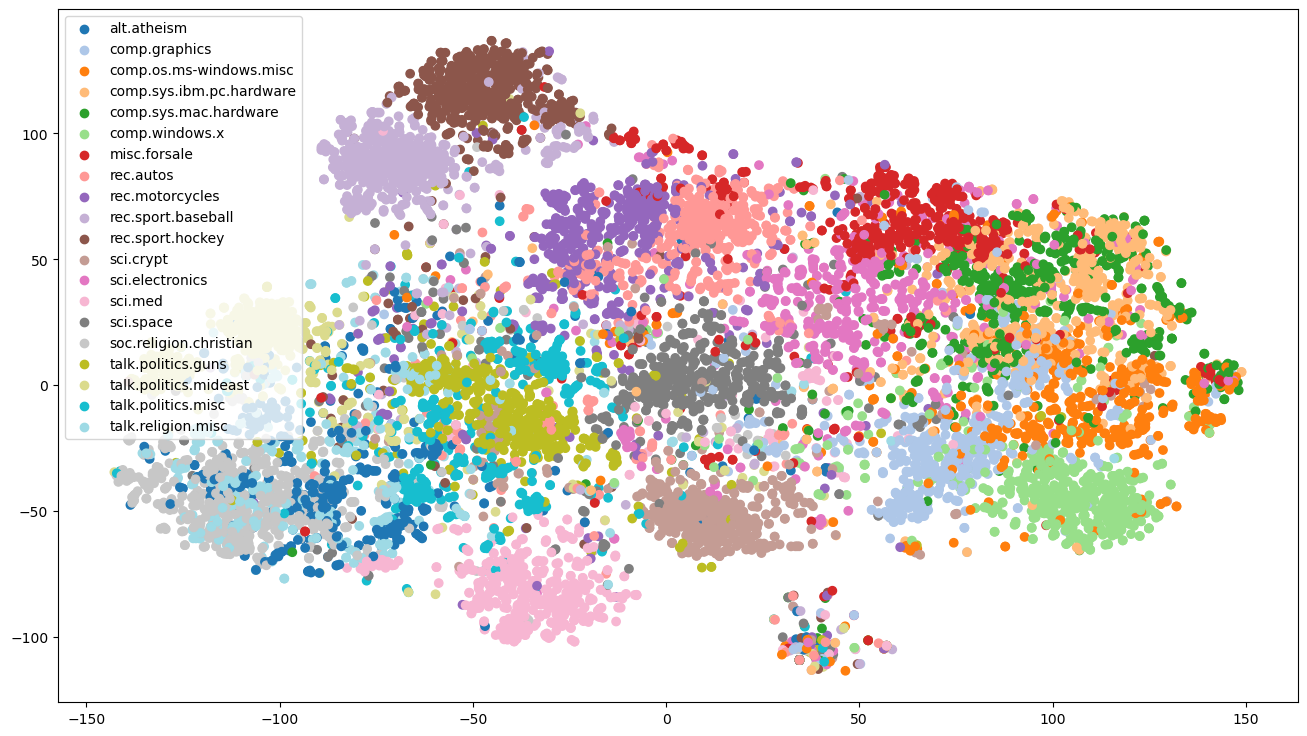

In [50]:
plt.figure(figsize=(16, 9))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=kmeans.labels_, cmap='tab20')
plt.legend(handles=[plt.scatter([],[],color=plt.cm.tab20(i/20), label=f"Cluster {i}") for i in range(20)])
plt.show()

plt.figure(figsize=(16, 9))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=newsgroups_train.target, cmap='tab20')
plt.legend(handles=[plt.scatter([],[],color=plt.cm.tab20(i/20), label=newsgroups_train.target_names[i]) for i in range(20)])
plt.show()

In [61]:
# Generate topics using LDA for each cluster
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

labels = {i : '' for i in range(num_clusters)}

print( [newsgroups_train.data[j] for j in range(len(newsgroups_train.data)) if kmeans.labels_[j] == 18])

for i in range(num_clusters):
    if i == 18:
        continue
    cluster_data = [newsgroups_train.data[j] for j in range(len(newsgroups_train.data)) if kmeans.labels_[j] == i]
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(cluster_data)
    lda = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(X)
    labels[i] = ', '.join([vectorizer.get_feature_names_out()[i] for i in lda.components_[0].argsort()[:-1 - 1:-1]])
    print(f"Cluster {i}")
    print("Top 10 words per topic:")
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx}: {', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]])}")
    print()

['--\n', '', '', '', '', '', ' ', '', '', '', '', '', '', '', '', '', '\n', '', '', '', '', '\n', '\n\n', '', '', '', '\n', '', '\n\n\n\n\n\n\n', '\n\n\n\n\n', '\n\n\n\n\n\n\n\n\n\n', '', '', '', '\n', '', '', '\n\n\n\n\n\n\n', '', '', '', '', '', '', '', '', '', '', '', '', '\n\n', '', '\n\n', '', '', '', '', '', '', '', '\n\n\n', '', '\n', '\n\n\n', '', '', '', '\n', '', '', '', '', '', '', '', '\n', '', '\n\n ', '', '\n\n', '', '\n\n\n', '', '', '', '', ' ', '', '', '\n\n\n\n\n', '', '', '\n\n\n', '\n\n\n\n\n\n', '', '', '', '', '', '', '', '\n\n', '', '', '', '', '', '', '', '\n', '', '', '\n\n', '', '', '\n', '', '\n', '', '', '', '', '', '', '', '\n\n\n\n', '', '\n', '', '\n\n', '', '', '\n', '\n', '', '\n\n', '', '', '\n', '', '\n\n\n', '', '\n\n\n\n', '', '', '', '', '\n', '', '  \n\n', '', '\n\n\n\n\n', '', '\n', '', '', '\n', '', '\n', '\n', '', '', '', '', '', '', '', '', '', '', '', '', '', '\n\n', '', '', '\n\n\n\n\n\n', '', '\n\n', ' ', '', '\n\n\n', '', '\n\n\n', '\n', '

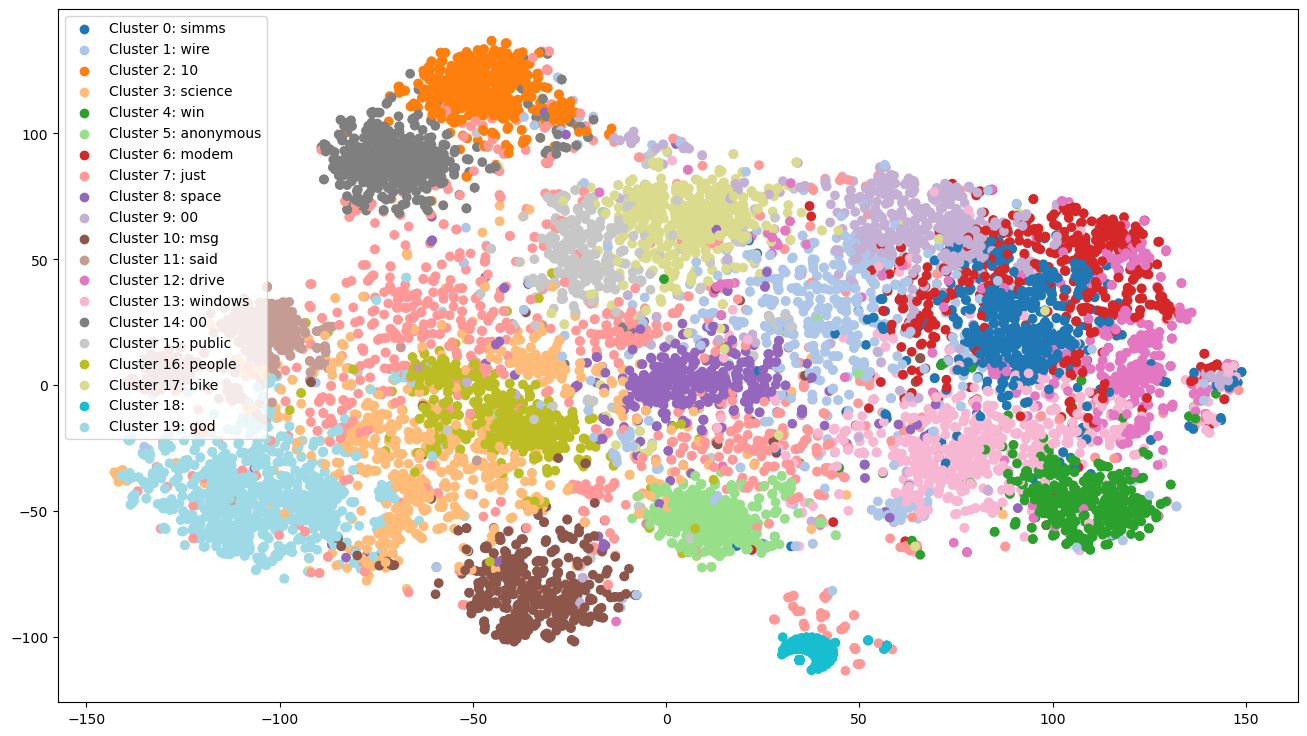

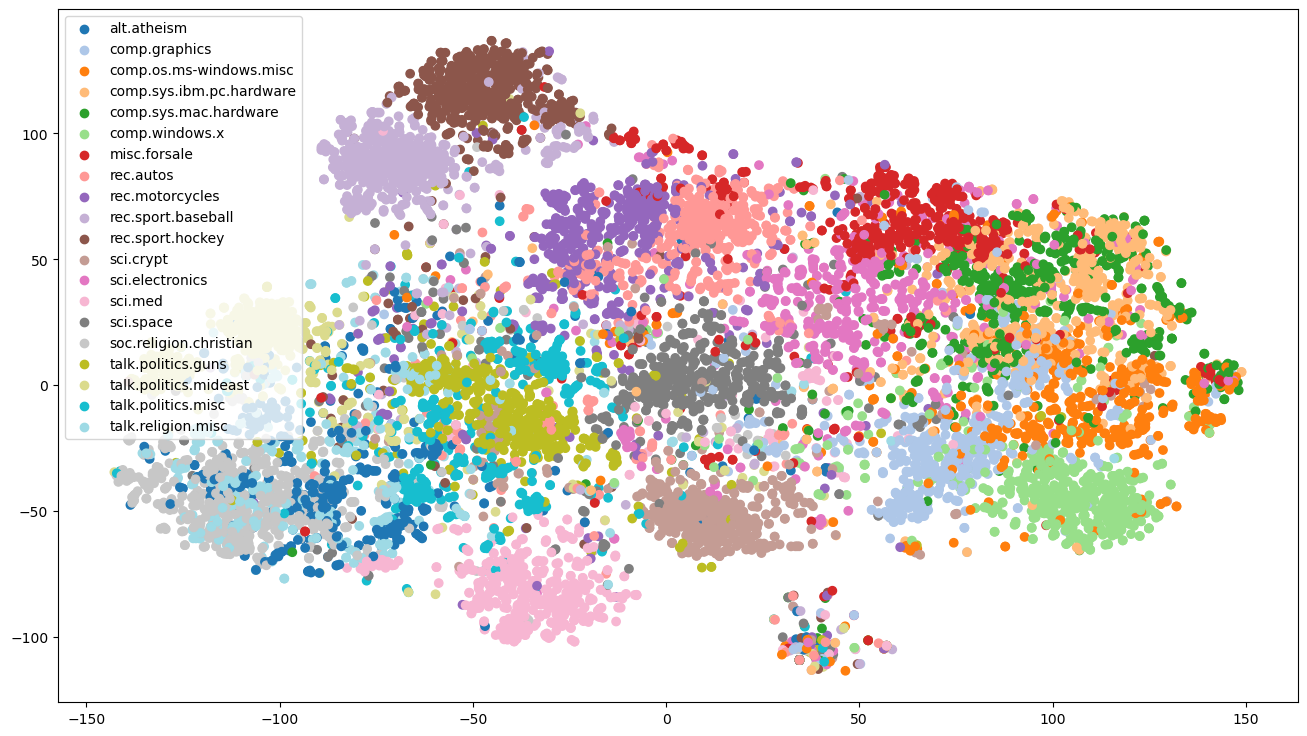

In [60]:
plt.figure(figsize=(16, 9))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=kmeans.labels_, cmap='tab20')
plt.legend(handles=[plt.scatter([],[],color=plt.cm.tab20(i/20), label=f"Cluster {i}: {labels[i]}") for i in range(20)])
plt.show()

plt.figure(figsize=(16, 9))
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=newsgroups_train.target, cmap='tab20')
plt.legend(handles=[plt.scatter([],[],color=plt.cm.tab20(i/20), label=newsgroups_train.target_names[i]) for i in range(20)])
plt.show()